# Import all libraries #

In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dense,InputLayer
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# load data #

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# train and test data #

In [14]:
print('train_data=',x_train.shape)
print('train_data_labels=',y_train.shape)
print('test_data=',x_test.shape)
print('test_data_labels=',y_test.shape)


train_data= (60000, 28, 28)
train_data_labels= (60000,)
test_data= (10000, 28, 28)
test_data_labels= (10000,)


# Sample visualization #

label= 6


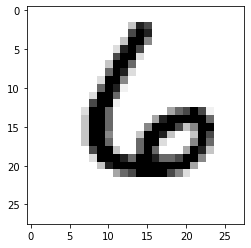

In [15]:
index=random.randint(1,60000)
print('label=',y_train[index])
#print(x_train[index])    ## by uncomment printing matrix visulation of index
plt.imshow(x_train[index],cmap='Greys')

# Normalization and label encoding #

In [16]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# Model definition #

In [51]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)) ) ## alternativly you can manually convert 28*28 matrix into single 1d dimensional vector 1*784 
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax')) ## output layer we have 10 classes(0,1,2,3,4,5,6,7,8,9) so last nodes is 10
model.summary()  ## model architecture number of parametrs
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy']) ## Compiling with the loss function and optimizer

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               200960    
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dense_28 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


# Model training #

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=20)


# Model evaluation #

Text(0.5, 0.98, 'MLP training and validation curves')

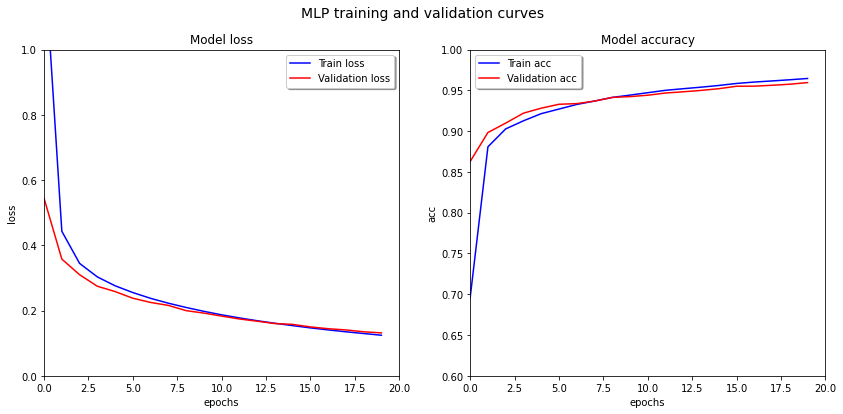

In [85]:
fig, ax=plt.subplots(1,2, figsize=(14,6))
x=np.linspace(2,20)
ax[0].plot(history.history['loss'], color='b', label='Train loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss',axes=ax[0])
ax[0].set_xlim(0,20)
ax[0].set_ylim(0,1)
ax[0].set_title('Model loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
legend=ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='Train acc')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation acc')
ax[1].set_xlim(0,20)
ax[1].set_ylim(0.6,1)
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('acc')
legend=ax[1].legend(loc='best', shadow=True)
fig.suptitle('MLP training and validation curves',fontsize=14)

In [20]:
## evaulate performance
loss,acc=model.evaluate(x_test,y_test,batch_size=256,verbose=0)
print('Test loss =',loss)
print('Test accuracy =',acc)

Test loss = 0.013088671490550041
Test accuracy = 0.9818999767303467


# Prediction #

6281
actual= 2
predicted= 2


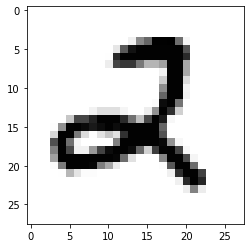

In [89]:
### make predection
index=random.randint(1,10000)
print(index)
digit=x_test[index]
plt.imshow(digit,cmap='Greys')
print('actual=',y_test[index].argmax())
prediction=model.predict(x_test[index].reshape(1,28,28))
print('predicted=',np.argmax(prediction))
